# 5.4 Extended Isolation Forest
Standardowa metoda Isolation Forest stara się pociąć oryginalny zbiór korzystając z warunków $x_{i} <= t_{m}$. Wprowadza to pewne ograniczenia, ponieważ nie jesteśmy w stanie wykryć nawet prostych zależności w danych. Jednym z podstawowych obejść tego problemu jest metoda **Extended Isolation Forest** która stara się "odcinać" poszczególne punkty za pomocą prostych $ y = ax + b $, co może trochę przypominać regresję liniową.

In [2]:
import pandas as pd
import numpy as np

In [3]:
np.random.seed(89145)

x = np.random.normal(loc=0, size=1000)
y = np.random.normal(loc=0, size=1000)

x = np.append(x, [-4, -4, 4, 4])
y = np.append(y, [-3.5, 3, -3.75, 3.8])

xy_df = pd.DataFrame({
    "x": x,
    "y": y,
})

In [5]:
x_min, x_max = xy_df["x"].min(), xy_df["x"].max()

In [6]:
import matplotlib.pyplot as plt

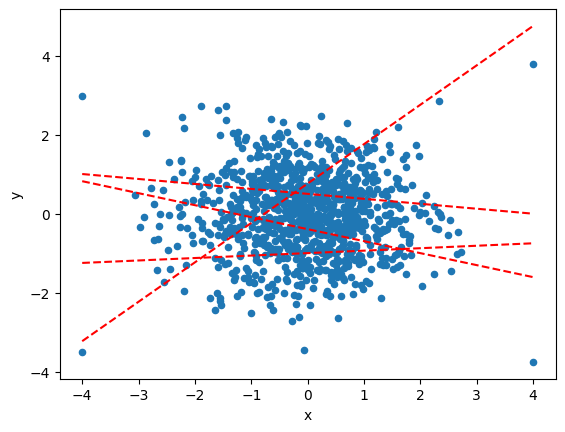

In [7]:
xy_df.plot.scatter(x="x", y="y")
for a, b in zip(np.random.uniform(-1, 1, size=4),
                np.random.uniform(-1, 1, size=4)):
    plt.plot([x_min, x_max], [a * x_min + b, a * x_max + b], "r--")

In [8]:
seismic_bumps_df = pd.read_parquet("../data/seismic_bumps_df.parquet")
seismic_bumps_df.sample(5)

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,...,seismic_b,seismoacoustic_a,seismoacoustic_b,seismoacoustic_c,shift_N,shift_W,ghazard_a,ghazard_b,ghazard_c,class
1497,33640.0,699.0,150.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,True,True,False,False,0
2301,12850.0,193.0,-51.0,-60.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,True,True,False,False,0
1237,44960.0,1172.0,115.0,88.0,1.0,1.0,0.0,0.0,0.0,200.0,...,True,True,False,False,False,True,True,False,False,0
794,3860.0,77.0,-38.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,True,False,False,0
1377,21300.0,710.0,19.0,55.0,1.0,0.0,1.0,0.0,0.0,2000.0,...,True,False,True,False,False,True,True,False,False,0


In [9]:
X = seismic_bumps_df.drop(columns="class")
y = seismic_bumps_df["class"]

In [11]:
import eif

ModuleNotFoundError: No module named 'eif'

In [12]:
eiforest = eif.iForest(X.values, ntrees=200,
                       sample_size=256,
                       ExtensionLevel=1,
                       seed=5)

NameError: name 'eif' is not defined

In [ ]:
seismic_bumps_df["anomaly_score"] = eiforest \
    .compute_paths_single_tree(X.values, 0)
seismic_bumps_df.sample(n=5).T

In [ ]:
seismic_bumps_df.boxplot(column="anomaly_score", by="class", 
                         figsize=(10.5, 7.5))

In [ ]:
seismic_bumps_df.groupby("class") \
    .describe()["anomaly_score"]